# Exercise 03

## Data preparation and model evaluation exercise with credit scoring

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


Read the data into Pandas

In [37]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('../datasets/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.io.parsers.read_table(f, sep=',')

data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [38]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
data['SeriousDlqin2yrs'].value_counts()

0    105299
1      7616
Name: SeriousDlqin2yrs, dtype: int64

# Exercise 3.1

Input the missing values of the Age and Number of Dependents 

Es importante antes de correr algun modelo o hacer algun tratamiento a la data, revisar los valores fatantes. a continuacion se observa que la variable age,y NumberOfDependents contiene valores missing. con 4267 registros en un total de 112.915 registros, es decir un 3,77% aproximadamente. por lo cual se llenan dichos valores con la mediana para no perder dichos registros. se toma la mediana o percentil 50  porque es una medida que nos indica la dispersión de los datos. por otro lado, se evidencia que para age existe un caso con age=0 como valor minimo el cual deberia excluirse y como edad maxima 103.

In [39]:
# check for missing values
data.isnull().sum()

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [40]:
data.shape

(112915, 12)

In [41]:
data['age'].describe()

count    108648.000000
mean         51.361304
std          14.453571
min           0.000000
25%          41.000000
50%          51.000000
75%          62.000000
max         103.000000
Name: age, dtype: float64

In [6]:
#data['age'].value_counts()

In [42]:
# fill missing values for age with the median age and number of dependents
data.age.fillna(data.age.median(), inplace=True)
data.NumberOfDependents.fillna(data.NumberOfDependents.median(), inplace=True)

In [43]:
# check for missing values
data.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [44]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [45]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [46]:
data['SeriousDlqin2yrs'].value_counts()

0    105299
1      7616
Name: SeriousDlqin2yrs, dtype: int64

# Exercise 3.2

From the set of features

Select the features that maximize the **F1Score** the model using K-Fold cross-validation


Para el calculo y la intepretacion se debe tener en cuenta las siguientes definiciones:

Condition positive (P) : the number of real positive cases in the data Condition negative (N) : the number of real negative cases in the data True positive (TP) True negative (TN) False positive (FP): Type I error False negative (FN) : eqv. with miss, Type II error

accuracy (ACC) = (TP + TN)/ P + N = (TP + TN)/ TP + TN + FP + FN

Definicion: F1= 2 (PPV TPR / PPV + TPR) = 2PT / (2TP + FP + FN)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
# se procece a realizar cross validation 

# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(str(iteration), str(data[0]), str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [24]:
# Create k-folds
kf = KFold(X.shape[0], n_folds=10, random_state=0)

results = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [25]:
 # train a logistic regression model
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
 # make predictions for testing set
y_pred_class = logreg.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
 # calculate testing accuracy
results.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

#ACC= (10483 + 9)/ TOTAL DE DATOS = 0,92

0.9292356744309627


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[10483,     6],
       [  793,     9]], dtype=int64)

In [32]:
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1e9)


In [33]:
# en todas ls iteracciones no varian mucho los resultados frente a las otras, el ACC esta alrededor del 93%

results = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
results

array([0.93260716, 0.93269571, 0.93234148, 0.93269571, 0.93269571,
       0.93243004, 0.93295545, 0.93295545, 0.93330972, 0.93286094])

In [71]:
print(results.mean())

0.9327547373582709


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

precision_score  0.6
recall_score     0.011221945137157107
f1_score     0.022031823745410035


Conclusiones generales del primer ejercicio: aunque el ACC esta alrededor del 93%  promedio en todas las muestras usando K=10 con cross validation, aparentemente es un buen modelo, sin embargo el f1_score es tan solo del 2%. lo que siginifica que la clase negativa no esta siendo identificada por el modelo. esto debido a que la clase o variable SeriousDlqin2yrs  esta imbalanceada con el 6,76%.

In [78]:
# Select the features that maximize the F1Score the model using K-Fold cross-validation

#Our goal here is to find the optimal value of K

from sklearn.neighbors import KNeighborsClassifier
# range of k we want to try
k_range = range(1, 100)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    results = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(results.mean())


print(k_scores)


[0.514848995583657, 0.5471384676392517, 0.5418158629697747, 0.5652050436640472, 0.5604138278379631, 0.5826874755184785, 0.578772991284226, 0.6037740305435357, 0.5999658499643945, 0.6213008678118241, 0.6177229238338915, 0.6439644668230488, 0.6402713774835209, 0.6602422787195628, 0.6561063572343306, 0.6747489495051444, 0.6715872011623323, 0.6904511859700293, 0.6868112010037518, 0.7037534187652627, 0.7002374365581729, 0.7188709972913865, 0.7155144387969589, 0.7304462331983598, 0.7281169898669821, 0.7421541166973474, 0.7399665901315713, 0.7515771944413298, 0.7495225060673103, 0.7599907769150747, 0.7581574897103897, 0.7679438987403456, 0.7656589078764366, 0.7765790973088114, 0.7746571953553232, 0.7859050896054744, 0.7842134799459126, 0.7946996601167661, 0.7930523578319535, 0.8034500542516237, 0.8017052680555217, 0.8123155545342673, 0.8104645046877195, 0.8209419098344053, 0.8191174517844839, 0.8306578244499054, 0.8285587471216251, 0.838088522294154, 0.836343734527176, 0.8449524213179338, 0.8

In [79]:

# en esencia, esto es básicamente ejecutar el método de validación cruzada k veces 100 veces porque queremos ejecutar valores K de 1 a 30
# el valor maximo de ACC corresponde a la iteracion 99 con 91%. de lo anterior se concluye que el modelo anterior esta calibrado.
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 99
Max of list 0.9190278335291409


Text(0,0.5,'Cross-validated accuracy')

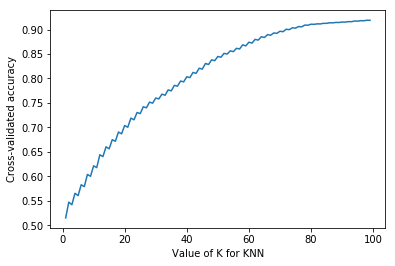

In [80]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

The maximum cv accuracy ocurre cuando entre  k=99 k=100, en este caso, para encontrar las variables o features que maximizan el F1 Score es el siguiente.

In [82]:
results = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
results

array([0.93260716, 0.93269571, 0.93234148, 0.93269571, 0.93269571,
       0.93243004, 0.93295545, 0.93295545, 0.93330972, 0.93286094])

In [84]:
# convert from MSE to RMSE
import numpy as np
rmse_scores = np.sqrt(results)
print(rmse_scores)

[0.96571588 0.96576173 0.96557831 0.96576173 0.96576173 0.96562417
 0.96589619 0.96589619 0.96607956 0.96584726]


en este caso, las variables o features que maximizan corresponden a los valores anteriores cercanos a 1. es decir todas las variables dentro del modelo.

# Exercise 3.3

Now which is the best set of features selected by AUC

Para seleccionar las mejores variables, a continuación es necesario encontrar las variables con variación por debajo de un punto de corte. La idea es que cuando una variable no varía mucho, generalmente tiene muy poco poder predictivo. Sin embargo este método no relaciona la variable de respuesta entre las mismas variables. Lo único que observa este proceso es la variación dentro de cada variable.

In [48]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
from sklearn.feature_selection import VarianceThreshold

In [49]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
feature_set = sel.fit_transform(X)

Función del ROC: El mejor modelo es con 9 variables ya que es el que tiene mayor AUC

In [50]:
for i in range(2,len(data.columns)):
    X=data.iloc[:,i:]
    y=data.SeriousDlqin2yrs
    logreg=LogisticRegression(C=1e9)
    results=cross_val_score(logreg,X, y, cv=3, scoring='roc_auc')
    print("Variable %s-> ROC_AUC: %s" % (len(data.columns)-i, pd.Series(results).mean()))

Variable 10-> ROC_AUC: 0.6773325493020302
Variable 9-> ROC_AUC: 0.6946471395792102
Variable 8-> ROC_AUC: 0.6641314376944921
Variable 7-> ROC_AUC: 0.6108474115586038
Variable 6-> ROC_AUC: 0.6113258159547246
Variable 5-> ROC_AUC: 0.581782175627945
Variable 4-> ROC_AUC: 0.585609324772863
Variable 3-> ROC_AUC: 0.5900729374608203
Variable 2-> ROC_AUC: 0.5919118789920467
Variable 1-> ROC_AUC: 0.5477952944963926
